**Use the code space below to add your**

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

C:\Users\antuh\AppData\Local\Temp\ipykernel_8412\1047952366.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


##### Load DataSet

In [62]:
data = pd.read_csv('G:/Code_Files/CS4S773/Assessment-1/Trust_Bank data.csv')


C:\Users\antuh\AppData\Local\Temp\ipykernel_8412\2301345011.py:1: DtypeWarning: Columns (18,19,20,21,27,28,29,30,31,44,48,56,102,103,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('G:/Code_Files/CS4S773/Assessment-1/Trust_Bank data.csv')


##### Details Data Set Types

In [ ]:
print(data.dtypes)

TransactionID                   int64
isFraud                         int64
TransactionDT                   int64
TransactionAmt                float64
ProductCD                      object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 138, dtype: object


In [63]:
# Display the first few rows of the dataset
print(data.head(5))

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0    NaN  150.0    discover  142.0  ...              0.0               0.0   
1  404.0  150.0  mastercard  102.0  ...              0.0               0.0   
2  490.0  150.0        visa  166.0  ...              0.0               0.0   
3  567.0  150.0  mastercard  117.0  ...              0.0               0.0   
4  514.0  150.0  mastercard  102.0  ...              0.0               0.0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \

In [64]:
#Shape of DataSet (num_rows, num_columns)
print(data.shape)

(590540, 138)


#### Check Missing Value

In [65]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [77]:
missing_data(data).head(10)

,Total,Percent
dist2,552913,93.628374
COMMONAREA_MODE,497894,84.311647
COMMONAREA_MEDI,497894,84.311647
COMMONAREA_AVG,497894,84.311647
NONLIVINGAPARTMENTS_AVG,496543,84.082873
NONLIVINGAPARTMENTS_MEDI,496543,84.082873
NONLIVINGAPARTMENTS_MODE,496543,84.082873
FONDKAPREMONT_MODE,493324,83.537779
LIVINGAPARTMENTS_AVG,493228,83.521523
LIVINGAPARTMENTS_MODE,493228,83.521523


#### Check Data Unbalance

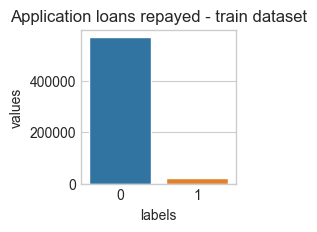

In [78]:
temp = data["isFraud"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (2,2))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

#### Let's see the type of the loans taken and also, on a separate plot, the percent of the loans (by type of the loan) with isFraud value 1 (not returned loan).

In [92]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = data[[feature, 'isFraud']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='isFraud', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6,8))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='isFraud', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

In [93]:
def plot_distribution(var):
    
    i = 0
    t1 = data.loc[data['isFraud'] != 0]
    t0 = data.loc[data['isFraud'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(6,6))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="isFraud = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="isFraud = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=6)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

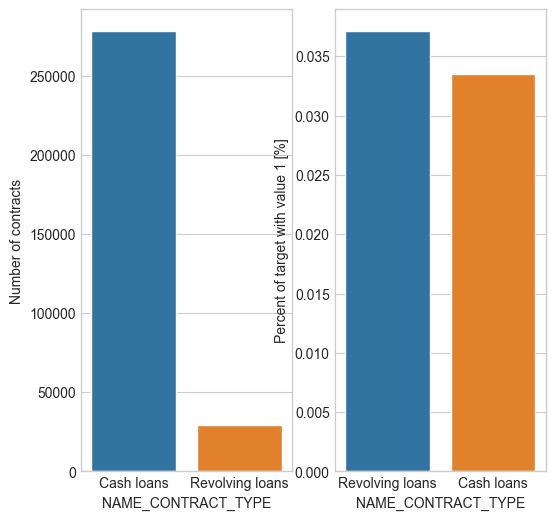

In [94]:
plot_stats('NAME_CONTRACT_TYPE')

##### Bar Plt FLAG_OWN_CAR

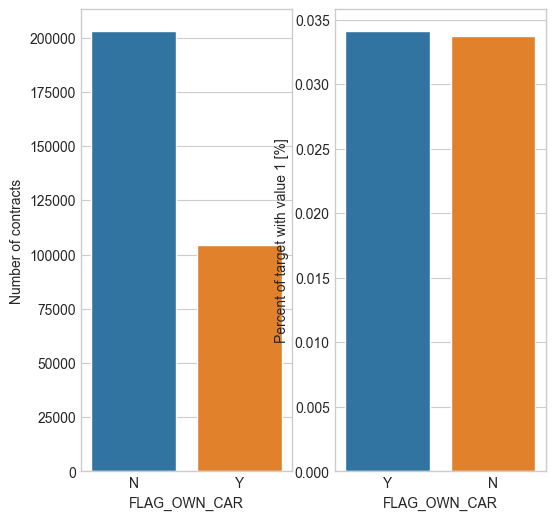

In [95]:
plot_stats('FLAG_OWN_CAR')

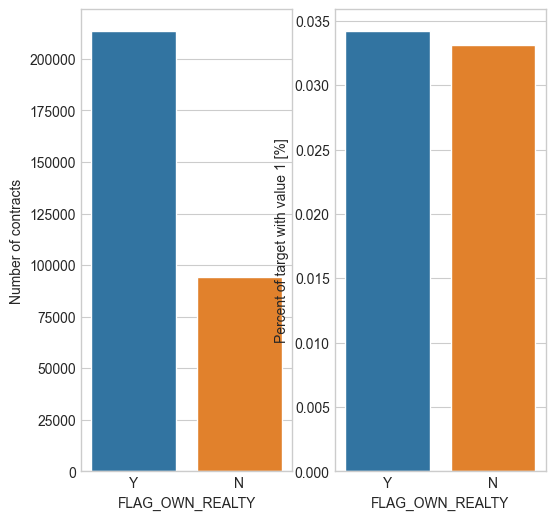

In [96]:
plot_stats('FLAG_OWN_REALTY')

### Client gender
Let's see the gender of the clients and also, on a separate plot, the percent of the loans (by client gender) with TARGET value 1 (not returned loan).

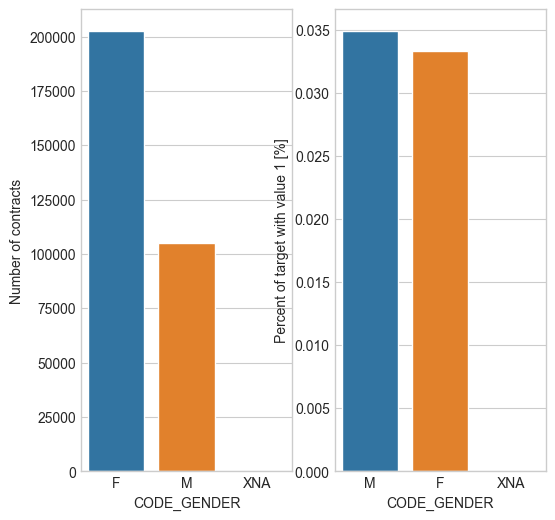

In [97]:
plot_stats('CODE_GENDER')

#### Flag own car and flag own real estateLet's inspect the flags that tell us if a client owns a car or real estate and, on separate plots, the percent of the loans value of these flags with TARGET value 1 (not returned loan)

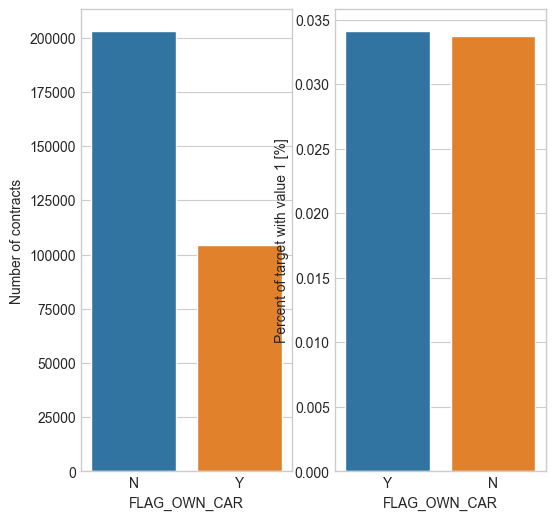

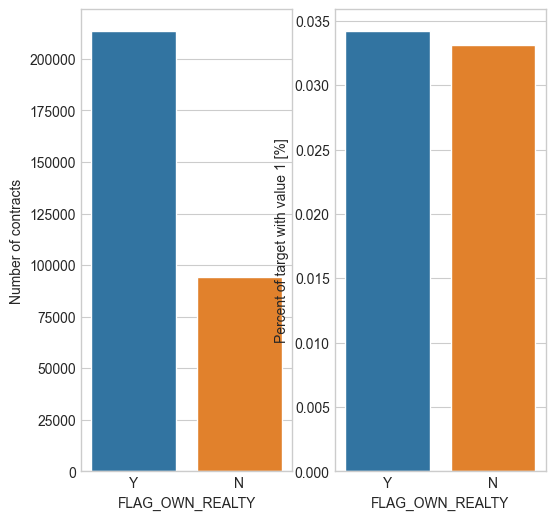

In [98]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

#### Family status of client¶


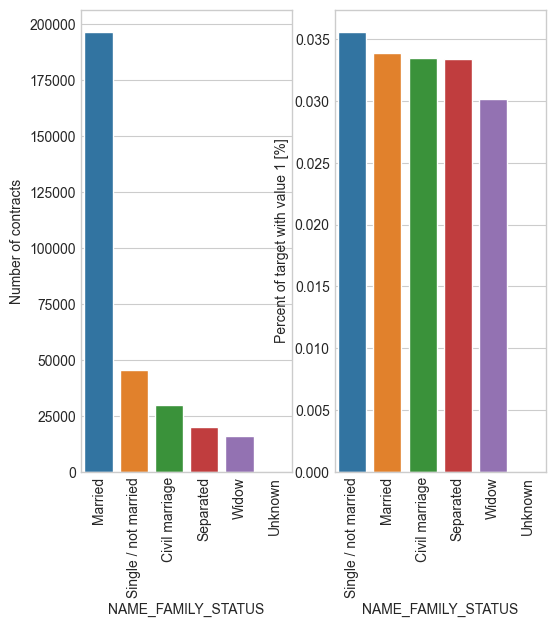

In [99]:
plot_stats('NAME_FAMILY_STATUS',True, True)

##### Number of children Let's see what is the distribution of the number of children of the clients

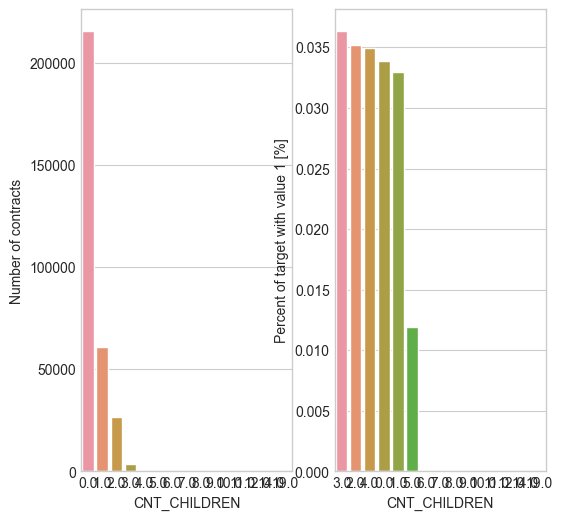

In [100]:
plot_stats('CNT_CHILDREN')


#### Number of family members of client


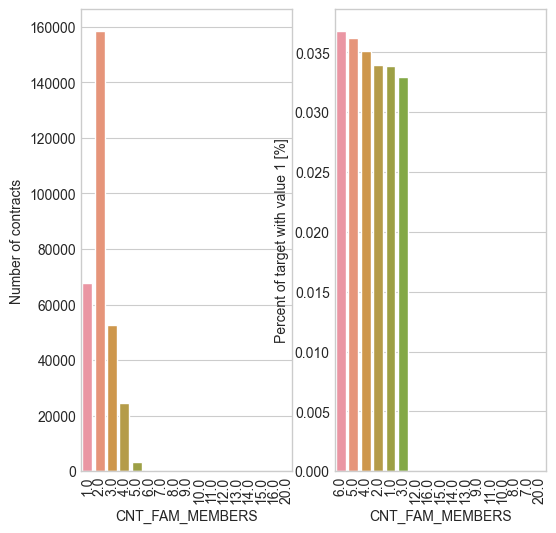

In [101]:
plot_stats('CNT_FAM_MEMBERS',True)

#### Income type of clientLet's investigate the numbers of clients with different income type. As well, let's see the percent of not returned loans per income type of applicants.

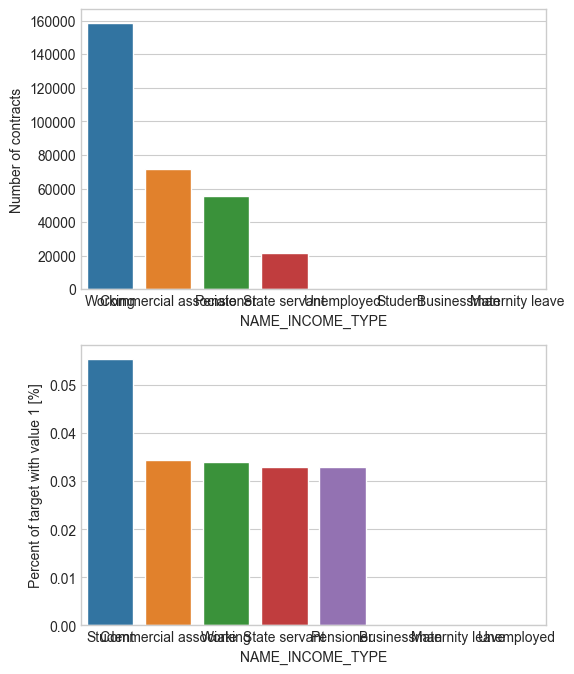

In [102]:
plot_stats('NAME_INCOME_TYPE',False,False)

###### Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant.The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.
Ocupation of client¶




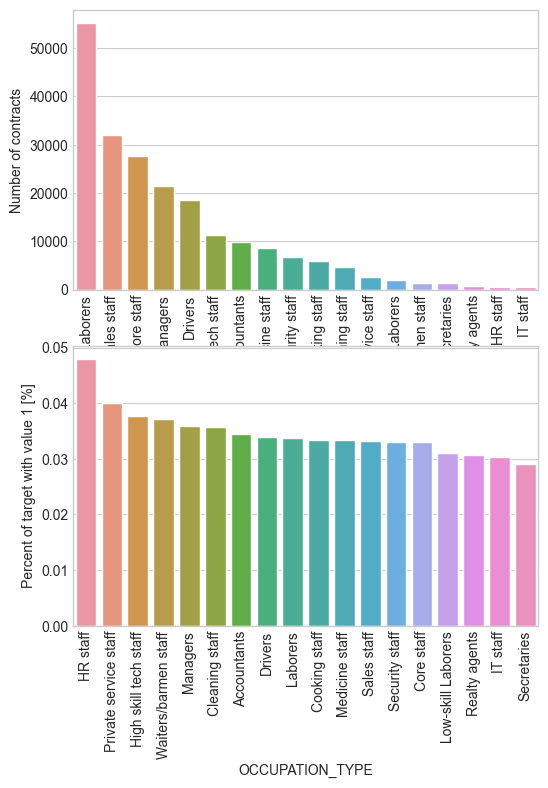

In [103]:
plot_stats('OCCUPATION_TYPE',True, False)

###### Organization type¶


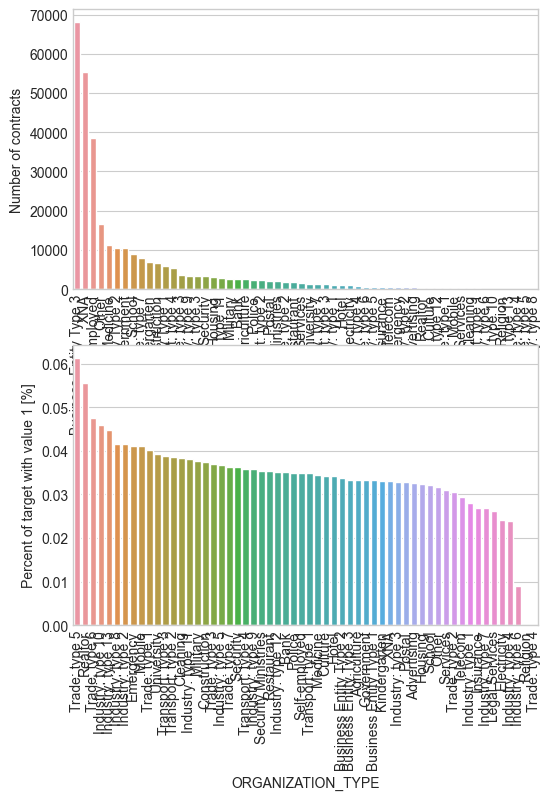

In [104]:
plot_stats('ORGANIZATION_TYPE',True, False)

##### Education type of the client¶


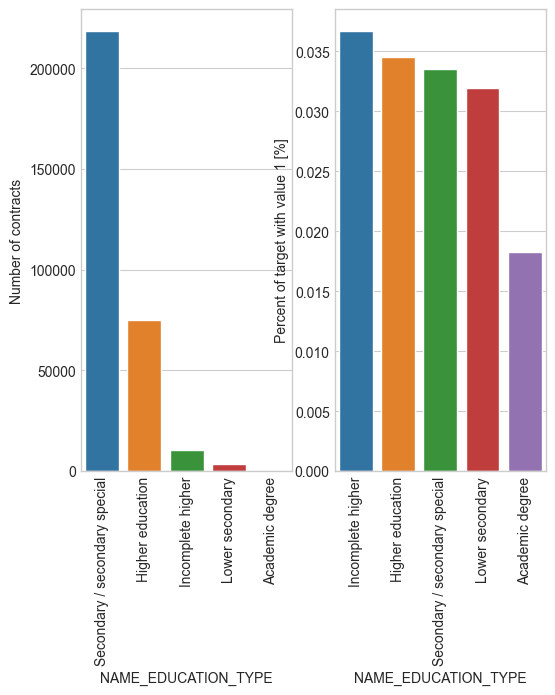

In [105]:
plot_stats('NAME_EDUCATION_TYPE',True)

###### Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree.The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% not-repayment rate.

##### Type of the housing of client¶


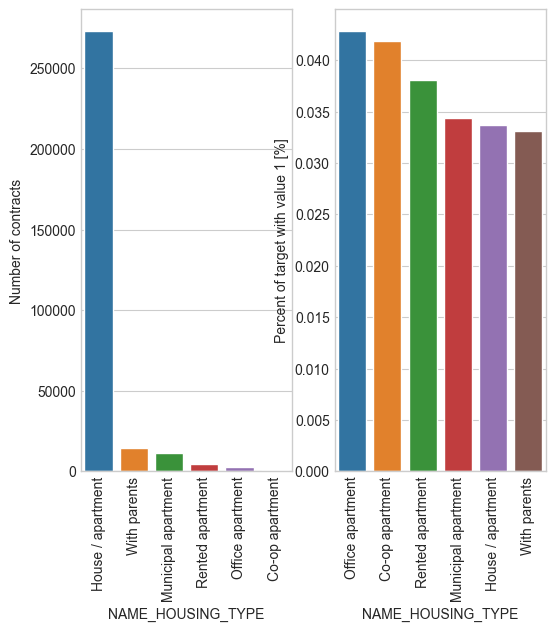

In [106]:
plot_stats('NAME_HOUSING_TYPE',True)

###### Over 250,000 applicants for credits registered their housing as House/apartment. Following categories have a very small number of clients (With parents, Municipal appartment).From these categories, Rented apartment and With parents have higher than 10% not-repayment rate.

##### Total income distribution Let's plot the distribution of total income for the clients.

C:\Users\antuh\AppData\Local\Temp\ipykernel_8412\1297103579.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature].dropna(),color=color, kde=True,bins=100)


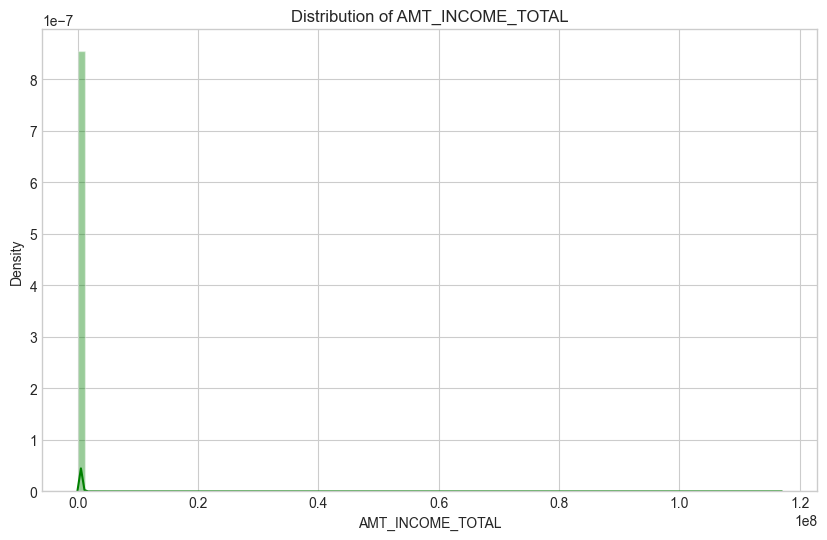

In [107]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(data[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()   
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = data.loc[data['isFraud'] != 0]
    t0 = data.loc[data['isFraud'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(6,3*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="isFraud = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="isFraud = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()
plot_distribution('AMT_INCOME_TOTAL','green')

C:\Users\antuh\AppData\Local\Temp\ipykernel_8412\1297103579.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature].dropna(),color=color, kde=True,bins=100)


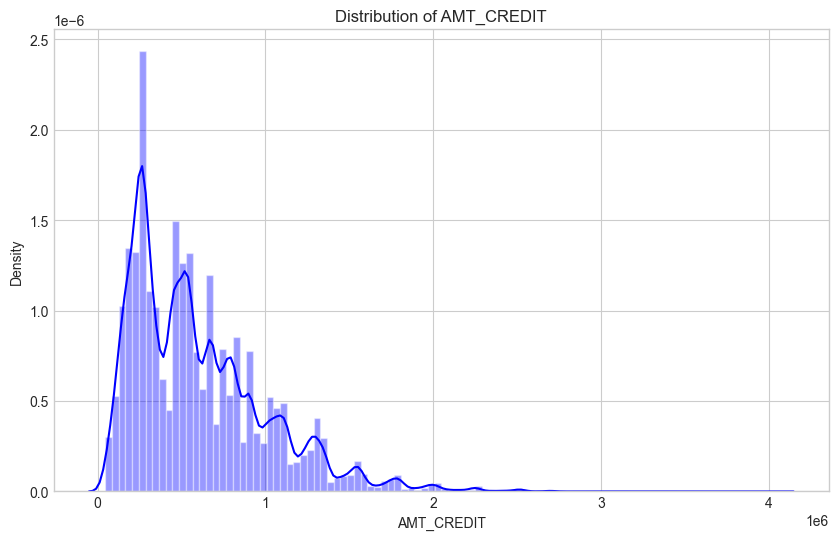

In [108]:
plot_distribution('AMT_CREDIT','blue')

##### Days of registration distribution

C:\Users\antuh\AppData\Local\Temp\ipykernel_8412\1297103579.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature].dropna(),color=color, kde=True,bins=100)


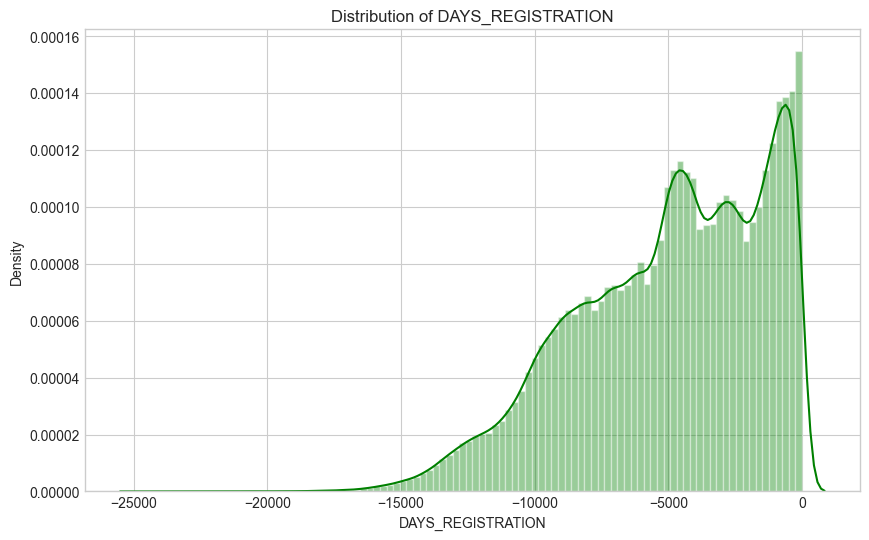

In [109]:
plot_distribution('DAYS_REGISTRATION','green')

###### Days ID publish distributio Let's plot the distribution of DAYS_ID_PUBLISH

C:\Users\antuh\AppData\Local\Temp\ipykernel_8412\1297103579.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature].dropna(),color=color, kde=True,bins=100)


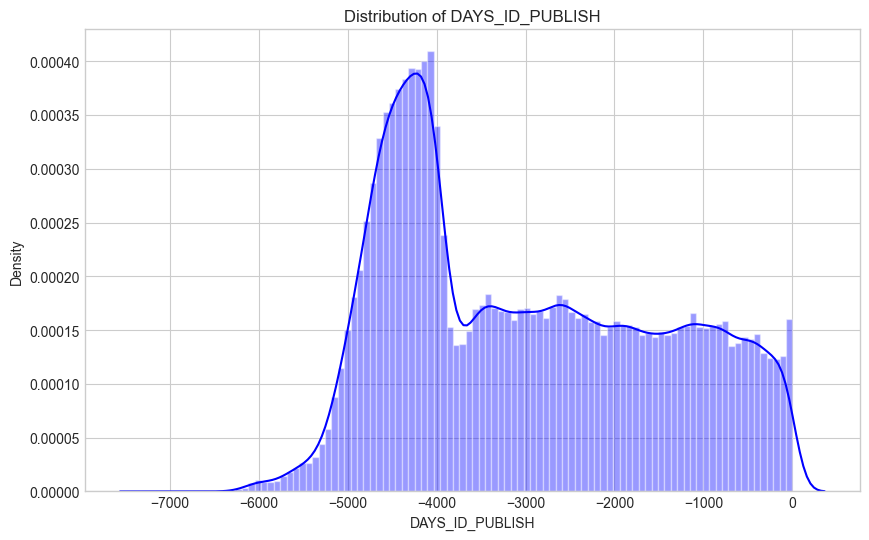

In [110]:
plot_distribution('DAYS_ID_PUBLISH','blue')

###### Comparison of interval values with isFruad = 1 and isFruad = 0Let's compare the distribution of interval values ploted above for values of isFruad = 1 and isFruad = 0

C:\Users\antuh\AppData\Local\Temp\ipykernel_8412\1297103579.py:21: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t1[feature], bw=0.5,label="isFraud = 1")
C:\Users\antuh\AppData\Local\Temp\ipykernel_8412\1297103579.py:22: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t0[feature], bw=0.5,label="isFraud = 0")
C:\Users\antuh\AppData\Local\Temp\ipykernel_8412\1297103579.py:21: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


<Figure size 640x480 with 0 Axes>

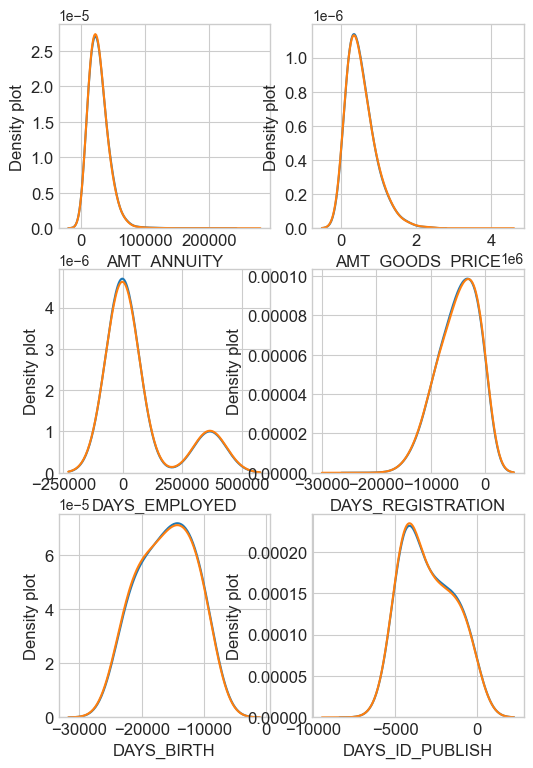

In [111]:
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
plot_distribution_comp(var,nrow=3)

##### Card 1 - 6 It has payment card related information like card type, country etc. It is given that these features are categorical.

In [112]:
cards = [col for col in data.columns if 'card' in col]
data[cards].head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


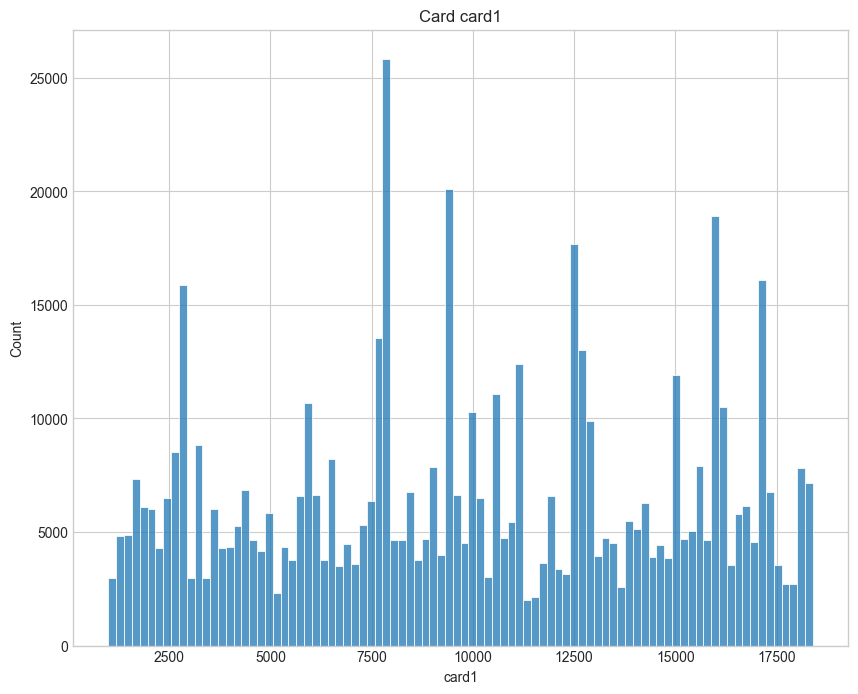

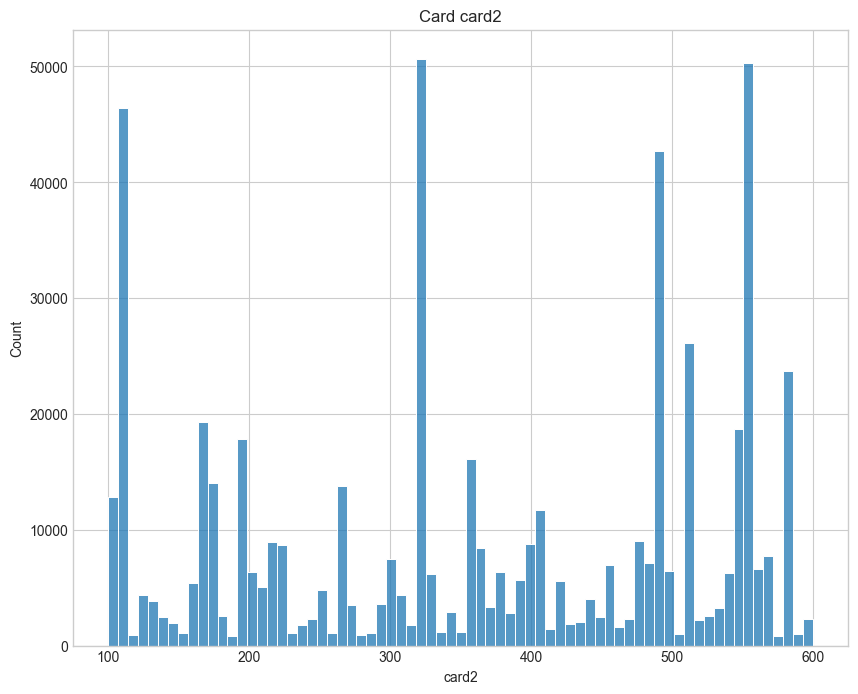

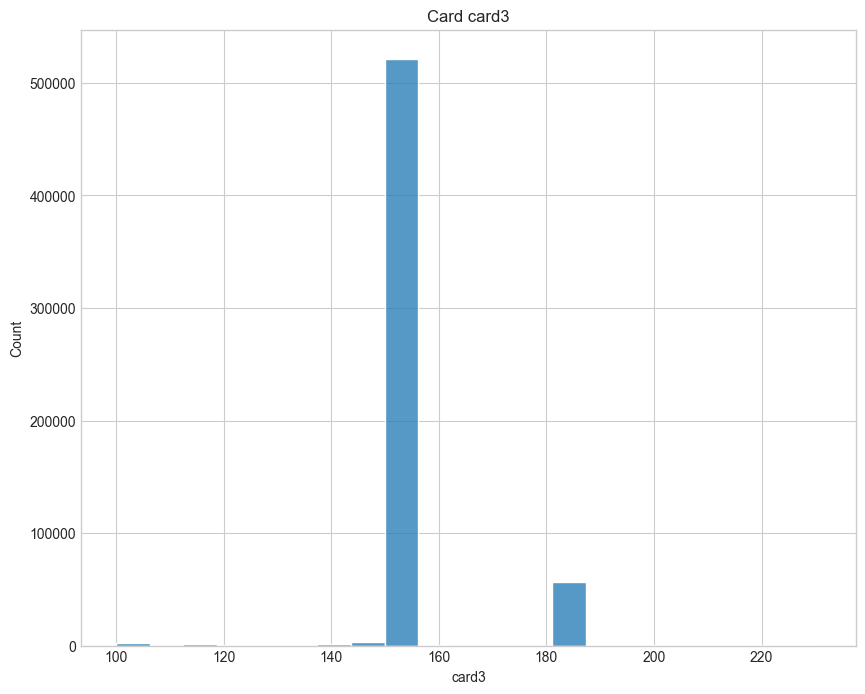

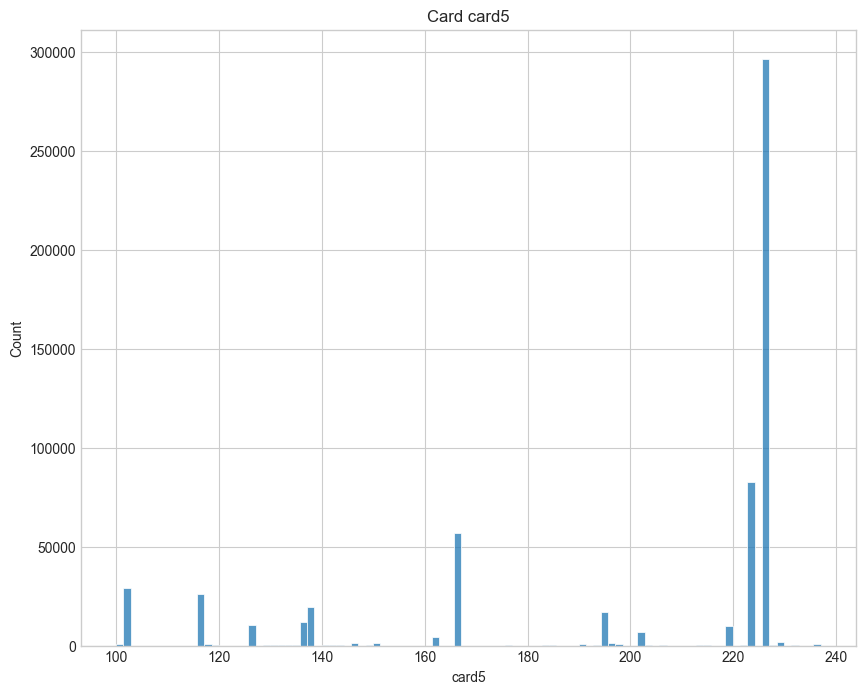

In [114]:
for c in cards:
    if data[c].dtypes in ['int64','float64']:
        fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,8))
        sns.histplot(data[c])
        axes.title.set_text(f'Card {c}')
        plt.show()

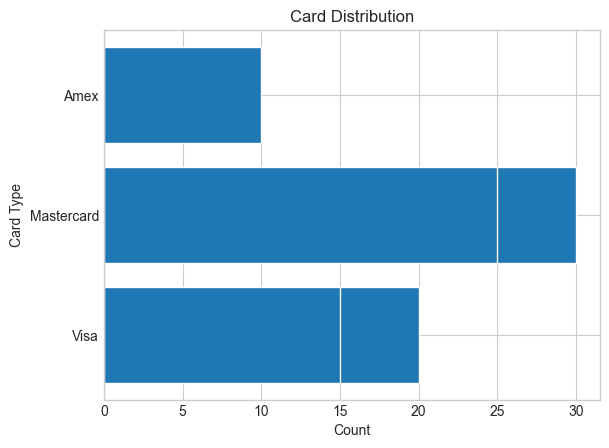

In [115]:
# Example data
data1 = pd.DataFrame({'card4': ['Visa', 'Mastercard', 'Visa', 'Amex', 'Mastercard'],
                     'count': [20, 30, 15, 10, 25]})

# Create a horizontal bar plot
plt.barh(data1['card4'], data1['count'])  # Fixed the column name to 'count'
plt.xlabel('Count')
plt.ylabel('Card Type')
plt.title('Card Distribution')
plt.show()



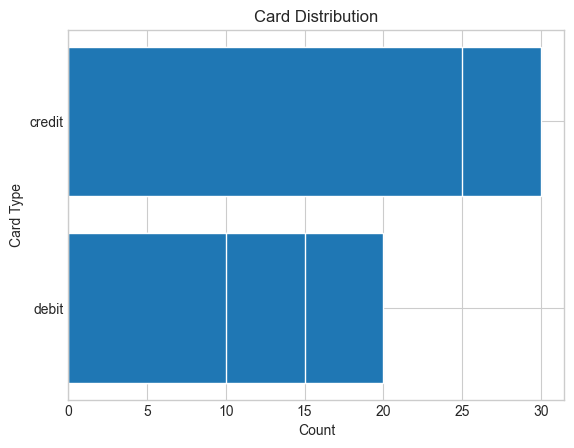

In [116]:
# Example data
data1 = pd.DataFrame({'card6': ['debit', 'credit', 'debit', 'debit', 'credit'],
                     'count': [20, 30, 15, 10, 25]})

# Create a horizontal bar plot
plt.barh(data1['card6'], data1['count'])  # Fixed the DataFrame name to 'data1'
plt.xlabel('Count')
plt.ylabel('Card Type')
plt.title('Card Distribution')
plt.show()

In [118]:
cards = ['card1','card2','card3','card5','isFraud']
data[cards].corr()

,card1,card2,card3,card5,isFraud
card1,1.000000,0.004960,0.002965,-0.093633,-0.013640
card2,0.004960,1.000000,0.023816,0.030486,0.003388
card3,0.002965,0.023816,1.000000,-0.158383,0.154151
card5,-0.093633,0.030486,-0.158383,1.000000,-0.033580
isFraud,-0.013640,0.003388,0.154151,-0.033580,1.000000


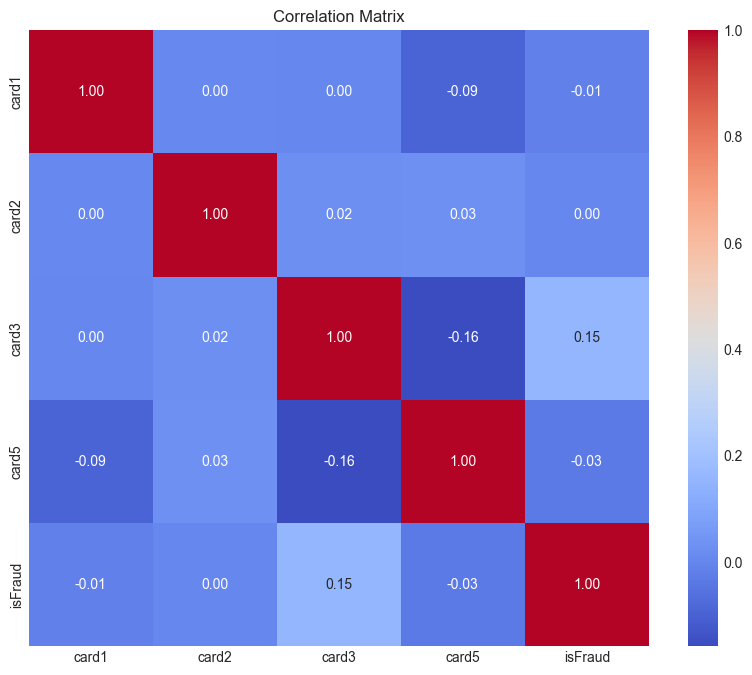

In [121]:
cards = ['card1', 'card2', 'card3', 'card5', 'isFraud']
corr_matrix = data[cards].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [119]:

# Check the column names in the DataFrame
print(data.columns)

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=138)


##### P_email domain and R_email domain Email domain of purchaser and email domain of recipiant

In [ ]:
print(df['P_emaildomain'].value_counts())

P_emaildomain
gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
roadrunner.com         305
windstream.net         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
netzero.com   

##### Coorelation analysis

In [ ]:
def top_missing_cols(data1,n=10,thresh=80):
    """
    returns missing columns in dataframe with missing values percent > thresh
    if n=None. It will gave whole dataframe with missing values percent > thresh
    """
    
    data1 = (data.isnull().sum()/df.shape[0])*100
    data1 = data1.reset_index()
    data1.columns = ['col','missing_percent']
    data1 = data1.sort_values(by=['missing_percent'],ascending=False).reset_index(drop=True)
    print(f'There are {data.isnull().any().sum()} columns in this dataset with missing values.')
    print(f'There are {data1[data1["missing_percent"] > thresh].shape[0]} columns with missing percent values than {thresh}%')
    if n:
        return data1.head(n)
    else:
        return data1

In [ ]:
df_missing = top_missing_cols(data,n=None,thresh=50)
# Taking all column with missing percen > 50
missing_cols = df_missing['col']

There are 132 columns in this dataset with missing values.
There are 132 columns with missing percent values than 50%


In [ ]:
# we will take all columns and group them based on missing percentage
nan_dict = {}
for col in missing_cols:
    count = data[col].isnull().sum()
    try:
        nan_dict[count].append(col)
    except:
        nan_dict[count] = [col]
        
for k,v in nan_dict.items():
    print(f'#####' * 4)
    print(f'NAN count = {k} percent: {(int(k)/data.shape[0])*100} %')
    print(v)

####################
NAN count = 552913 percent: 93.62837403054831 %
['dist2']
####################
NAN count = 497894 percent: 84.31164696718257 %
['COMMONAREA_MODE', 'COMMONAREA_MEDI', 'COMMONAREA_AVG']
####################
NAN count = 496543 percent: 84.0828733024012 %
['NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE']
####################
NAN count = 493324 percent: 83.53777898194873 %
['FONDKAPREMONT_MODE']
####################
NAN count = 493228 percent: 83.52152267416263 %
['LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI']
####################
NAN count = 491671 percent: 83.25786568225692 %
['FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI']
####################
NAN count = 487517 percent: 82.55444169742947 %
['YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG']
####################
NAN count = 485958 percent: 82.29044603244489 %
['OWN_CAR_AGE']
####################
NAN count = 465619 percent: 78.84631015680563 %
[

In [ ]:
def coorelation_analysis(cols,title='Coorelation Analysis',size=(12,12)):
    cols = sorted(cols)
    fig,axes = plt.subplots(1,1,figsize=size)
    df_corr = data[cols].corr()
    sns.heatmap(df_corr,annot=True,cmap='RdBu_r')
    axes.title.set_text(title)
    plt.show()

In [ ]:
def reduce_groups(grps):
    '''
    determining column that have more unique values among a group of atttributes
    '''
    use = []
    for col in grps:
        max_unique = 0
        max_index = 0
        for i,c in enumerate(col):
            n = data[c].nunique()
            if n > max_unique:
                max_unique = n
                max_index = i
        use.append(col[max_index])
    return use

##### Coorelation analysis Group By

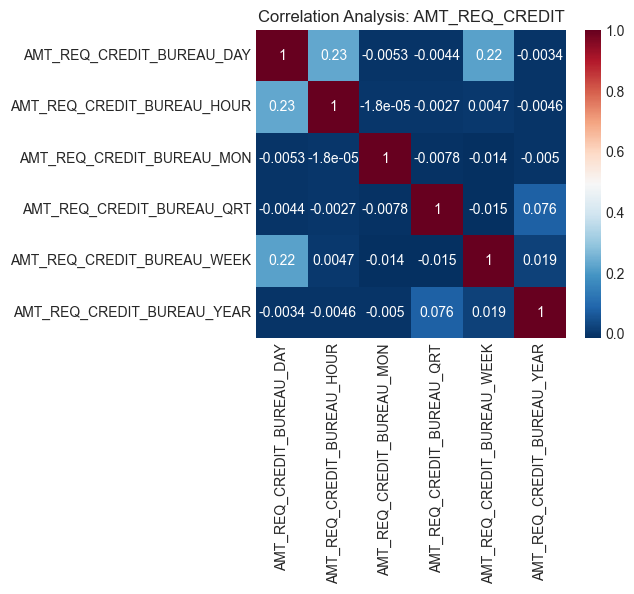

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

def coorelation_analysis(cols, title, data, size=(5, 4)):
    cols = sorted(cols)
    fig, axes = plt.subplots(1, 1, figsize=size)
    df_corr = data[cols].corr()
    sns.heatmap(df_corr, annot=True, cmap='RdBu_r')
    axes.set_title(title)
    plt.show()

# Assuming 'data5' is the DataFrame containing the desired columns
cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON']
coorelation_analysis(cols, title='Correlation Analysis: AMT_REQ_CREDIT', data=data)


#### Coorelation analysis on id columns

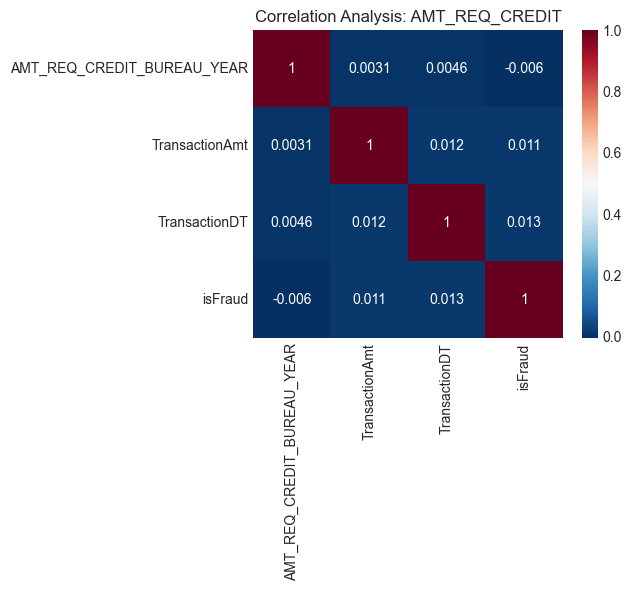

In [122]:
cat_cols = (['ProductCD'] + 
            ['card%d' % i for i in range(1, 6)] +  # Adjusted the range from 1 to 6
            ['FLAG_DOCUMENT_%d' % i for i in range(18, 22)] +  # Adjusted the range from 18 to 22
            ['TransactionID',
             'isFraud', 'TransactionDT', 
             'TransactionAmt', 'AMT_REQ_CREDIT_BUREAU_YEAR'])

# Assuming 'data5' is the DataFrame
type_map = {c: str for c in cat_cols}
data[cat_cols] = data[cat_cols].astype(type_map, copy=False)
data[cat_cols] = data[cat_cols].astype(type_map, copy=False)

def coorelation_analysis(cols, title, data, size=(5, 4)):
    cols = sorted(cols)
    fig, axes = plt.subplots(1, 1, figsize=size)
    df_corr = data[cols].corr()
    sns.heatmap(df_corr, annot=True, cmap='RdBu_r')
    axes.set_title(title)
    plt.show()

# Assuming 'data5' is the DataFrame containing the desired columns
cols = ['isFraud','TransactionDT', 'TransactionAmt', 'AMT_REQ_CREDIT_BUREAU_YEAR']
coorelation_analysis(cols, title='Correlation Analysis: AMT_REQ_CREDIT', data=data)


In [ ]:
# Basic statistics of the dataset
print(data.describe())


       TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000    

#### Another observation is that there are certain days in which number of transactions is more than 10000

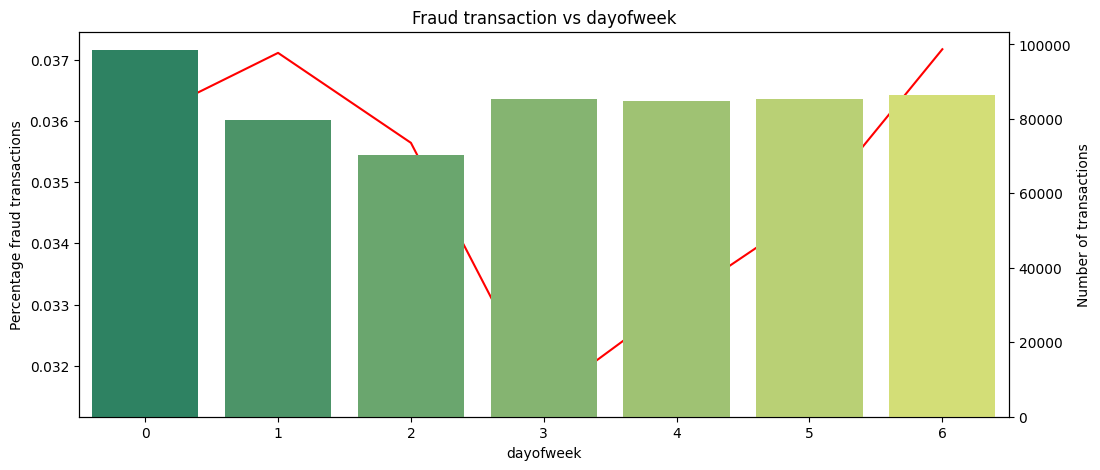

In [ ]:
data['dayofweek'] = (data['TransactionDT']//(60*60*24)-1)%7
tmp = data[['isFraud','dayofweek']].groupby(by=['dayofweek']).mean().reset_index() \
            .rename(columns={'isFraud':'Percentage fraud transactions'})

tmp_count = data[['TransactionID','dayofweek']].groupby(by=['dayofweek']).count().reset_index() \
            .rename(columns={'TransactionID':'Number of transactions'})
tmp = tmp.merge(tmp_count,on=['dayofweek'])

fig, axes = plt.subplots(figsize=(12,5))
axes = sns.lineplot(x=tmp['dayofweek'],y=tmp['Percentage fraud transactions'],color='r')
axes2 = axes.twinx()
axes2 = sns.barplot(x=tmp['dayofweek'],y=tmp['Number of transactions'],palette='summer')
axes.set_title('Fraud transaction vs dayofweek')
plt.show()


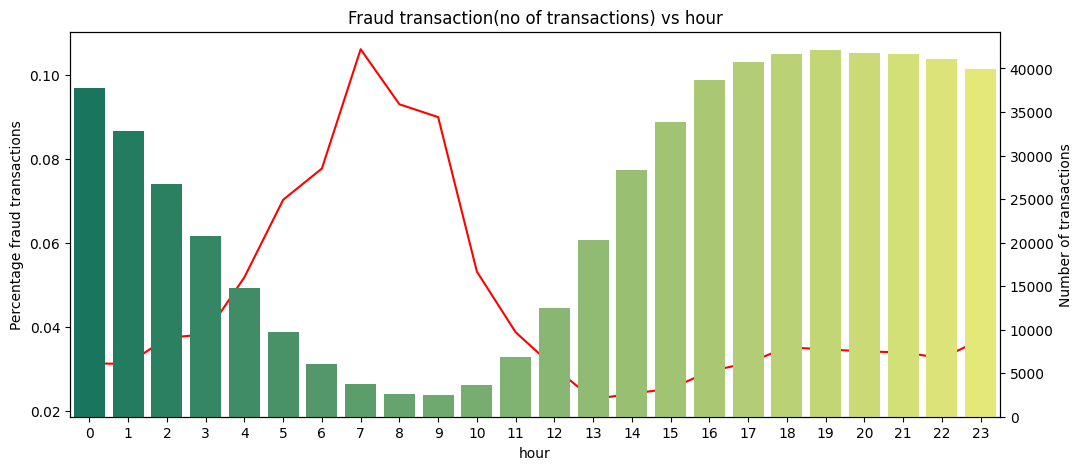

In [ ]:
data['hour'] = (data['TransactionDT']//(60*60))%24
tmp = data[['isFraud','hour']].groupby(by=['hour']).mean().reset_index() \
            .rename(columns={'isFraud':'Percentage fraud transactions'})

tmp_count = data[['TransactionID','hour']].groupby(by=['hour']).count().reset_index() \
            .rename(columns={'TransactionID':'Number of transactions'})
tmp = tmp.merge(tmp_count,on=['hour'])




fig, axes = plt.subplots(figsize=(12,5))
axes = sns.lineplot(x=tmp['hour'],y=tmp['Percentage fraud transactions'],color='r')
axes2 = axes.twinx()
axes2 = sns.barplot(x=tmp['hour'],y=tmp['Number of transactions'],palette='summer')
axes.set_title('Fraud transaction(no of transactions) vs hour')
plt.show()

##### TransactionAmt This is the amount associated with each transaction. We dont have any missing values in any of the transaction.Let us see tha average amount involved in transactions per hour and its fraudulen rate.

In [ ]:
data['TransactionAmt'].isnull().sum()

0

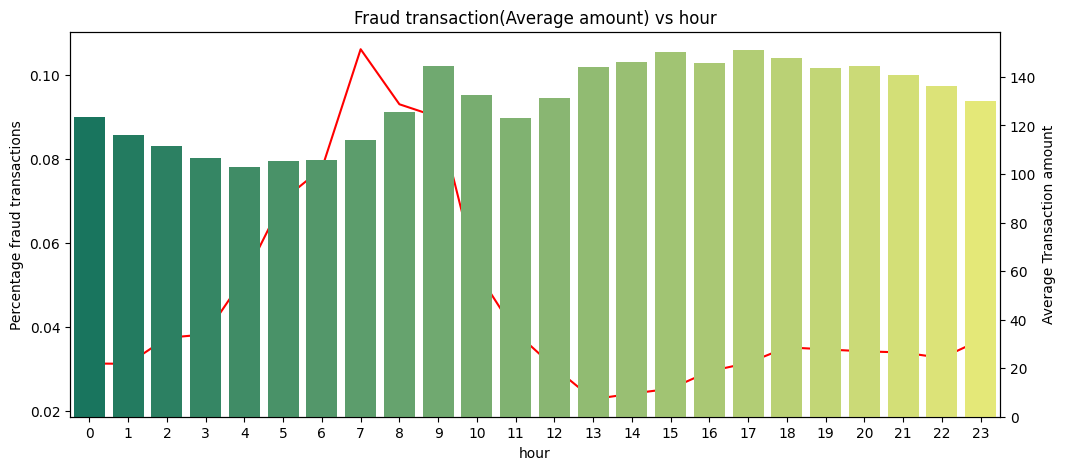

In [ ]:
data['hour'] = (data['TransactionDT']//(60*60))%24
tmp = data[['isFraud','hour']].groupby(by=['hour']).mean().reset_index() \
            .rename(columns={'isFraud':'Percentage fraud transactions'})

tmp_amount = data[['TransactionAmt','hour']].groupby(by=['hour']).mean().reset_index() \
            .rename(columns={'TransactionAmt':'Average Transaction amount'})
tmp = tmp.merge(tmp_amount,on=['hour'])




fig, axes = plt.subplots(figsize=(12,5))
axes = sns.lineplot(x=tmp['hour'],y=tmp['Percentage fraud transactions'],color='r')
axes2 = axes.twinx()
axes2 = sns.barplot(x=tmp['hour'],y=tmp['Average Transaction amount'],palette='summer')
axes.set_title('Fraud transaction(Average amount) vs hour')
plt.show()

### checking outliers 

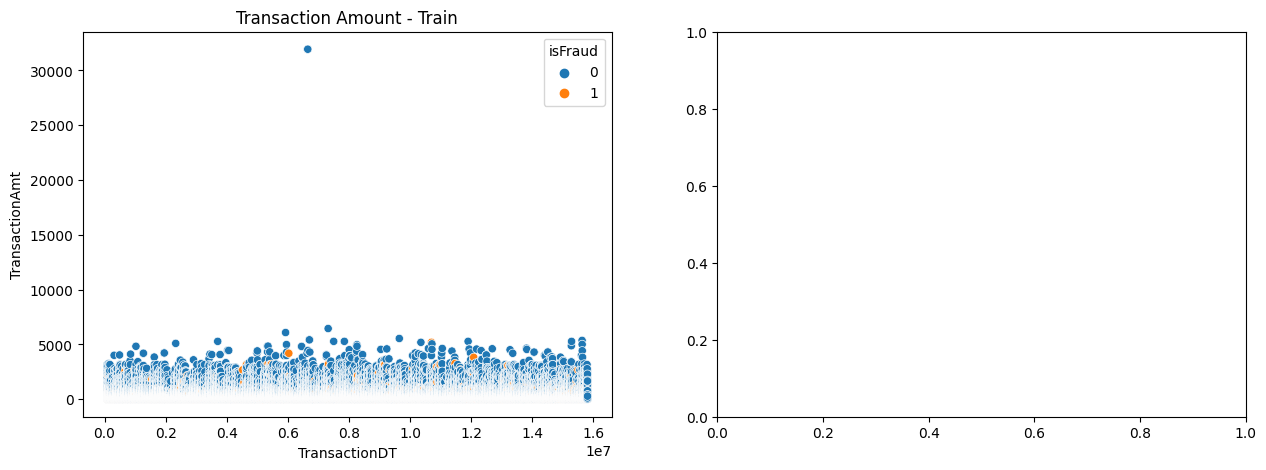

In [ ]:
# Assuming 'TransactionAmt', 'TransactionDT', and 'isFraud' are column names
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Left subplot
sns.scatterplot(y=data['TransactionAmt'], x=data['TransactionDT'], hue=data['isFraud'], ax=axes[0])
axes[0].set_title('Transaction Amount - Train')

plt.show()

### TransactionAmt vs Fraud

C:\Users\antuh\AppData\Local\Temp\ipykernel_7440\2655353956.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_fraud['TransactionAmt'] = np.log(dff_fraud['TransactionAmt'])
C:\Users\antuh\AppData\Local\Temp\ipykernel_7440\2655353956.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_notfraud['TransactionAmt'] = np.log(dff_notfraud['TransactionAmt'])
C:\Users\antuh\AppData\Local\Temp\ipykernel_7440\2655353956.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v

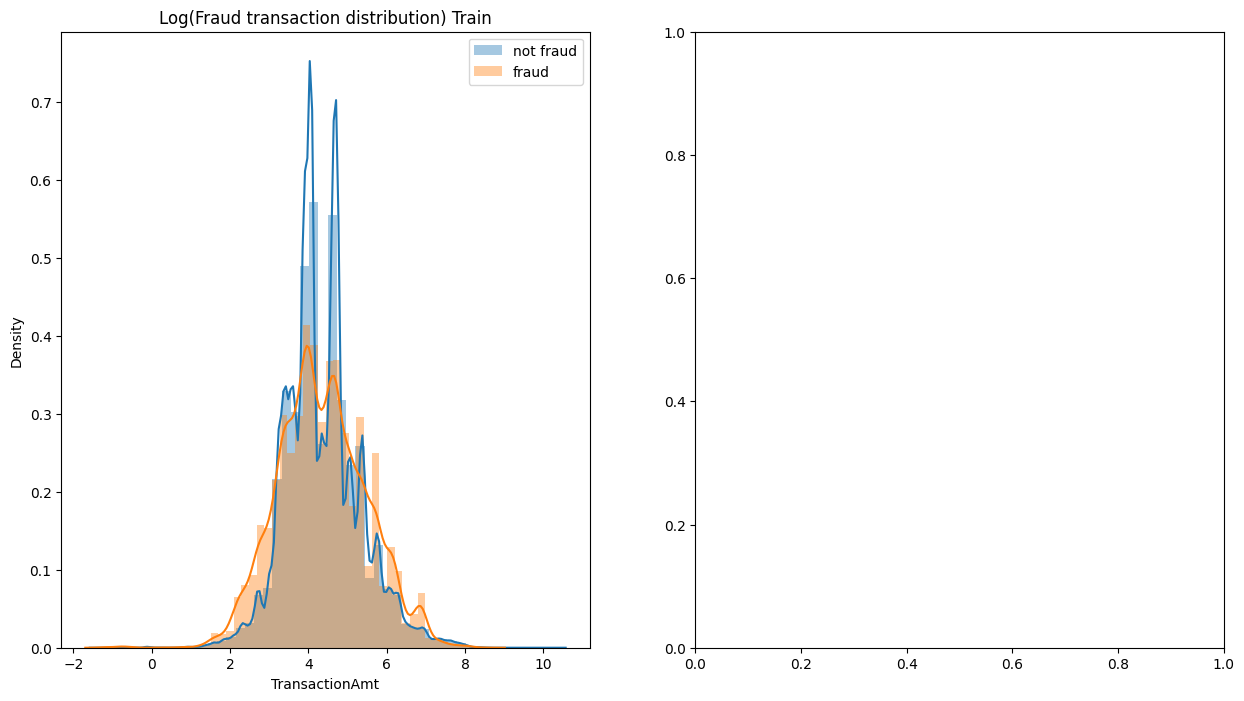

In [ ]:
import numpy as np



dff_fraud = data[data['isFraud'] == 1]
dff_notfraud = data[data['isFraud'] == 0]

dff_fraud['TransactionAmt'] = np.log(dff_fraud['TransactionAmt'])
dff_notfraud['TransactionAmt'] = np.log(dff_notfraud['TransactionAmt'])


fig,axes = plt.subplots(1,2,figsize=(15,8))
sns.distplot(dff_notfraud['TransactionAmt'],ax=axes[0],label='not fraud')
sns.distplot(dff_fraud['TransactionAmt'],ax=axes[0],label='fraud')
axes[0].title.set_text('Log(Fraud transaction distribution) Train')
axes[0].legend()

In [ ]:
# Identify the target feature
target_feature = 'isFraud'

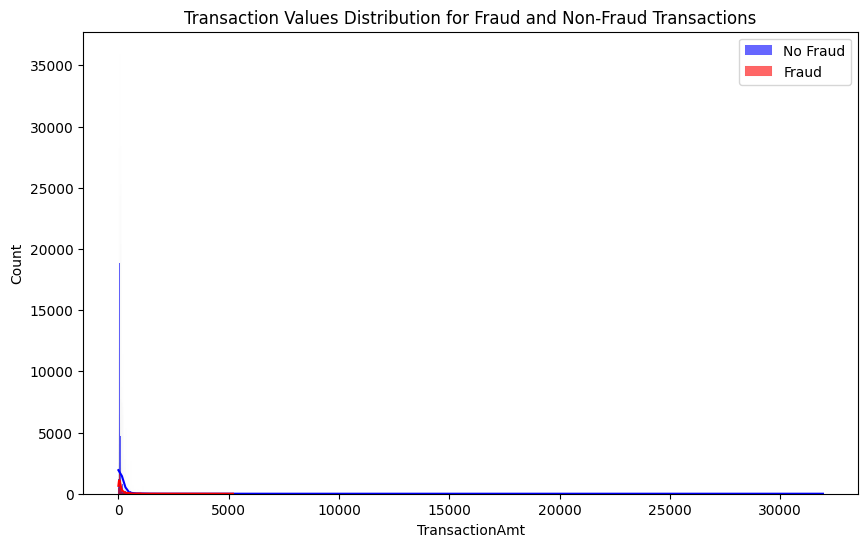

In [ ]:
# Analyze the distribution of transaction values for fraud and non-fraud transactions
plt.figure(figsize=(10, 6))
sns.histplot(data[data[target_feature] == 0]['TransactionAmt'], kde=True, color='blue', label='No Fraud', alpha=0.6)
sns.histplot(data[data[target_feature] == 1]['TransactionAmt'], kde=True, color='red', label='Fraud', alpha=0.6)
plt.title('Transaction Values Distribution for Fraud and Non-Fraud Transactions')
plt.legend()
plt.show()

### ProductCD This is the product code associated with each transaction

In [ ]:
# Identify predominant fraudulent products
fraudulent_products = data[data[target_feature] == 1]['ProductCD'].value_counts()
print("Predominant fraudulent products: \n", fraudulent_products)


Predominant fraudulent products: 
 ProductCD
W    8969
C    8008
H    1574
R    1426
S     686
Name: count, dtype: int64


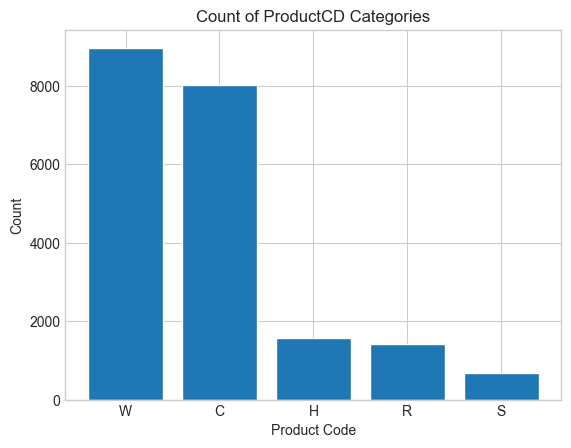

In [ ]:
import matplotlib.pyplot as plt

# Sample data
data = {'ProductCD': ['W', 'C', 'H', 'R', 'S'], 'count': [8969, 8008, 1574, 1426, 686]}

# Create a bar plot
plt.bar(data['ProductCD'], data['count'])
plt.xlabel('Product Code')
plt.ylabel('Count')
plt.title('Count of ProductCD Categories')
plt.show()


In [ ]:
def hor_plot(feat,df=data,label_rotation=False,shape=(12,8)):
    
    val_cnts = df[feat].value_counts()
    df1 = pd.DataFrame({feat: val_cnts.index,'Number of units': val_cnts.values})
    # Calculate the percentage of target=1 per category value.For that what we did is we took the mean value of TARGET
    percent = df[[feat, 'isFraud']].groupby([feat],as_index=False).mean()
    percent.sort_values(by='isFraud', ascending=False, inplace=True)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=shape)
    s = sns.barplot(ax=ax1, x = feat, y="Number of units",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feat, y='isFraud', order=percent[feat], data=percent)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    plt.ylabel('Percent of Fraud transactions [Target with value 1]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show()


In [ ]:
# Explore interesting patterns
# For example, check the correlation between transaction amount and the likelihood of fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x=target_feature, y='TransactionAmt', data=data)
plt.title('Boxplot of Transaction Value for Fraud and Non-Fraud Transactions')
plt.show()

NameError: name 'target_feature' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
data['isFraud'].value_counts()

isFraud
0.0    197159
Name: count, dtype: int64

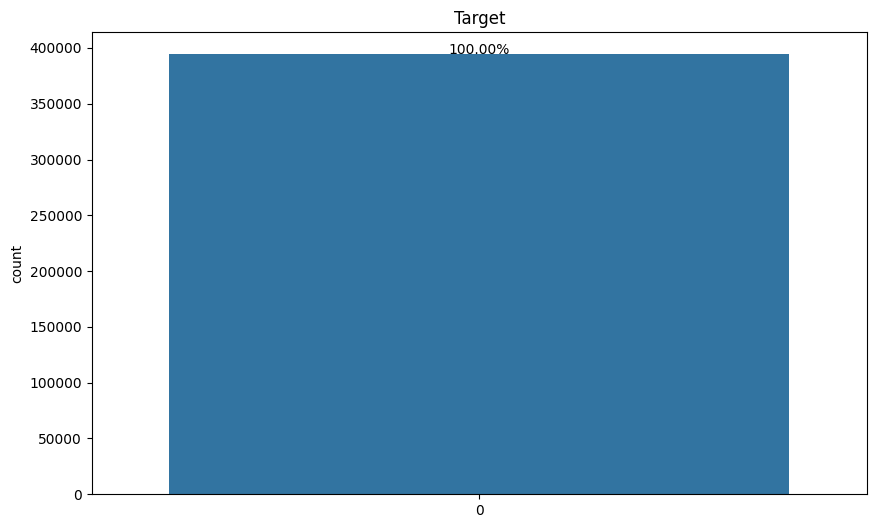

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,6))
sns.countplot(data['isFraud'])
axes.title.set_text('Target')
total = float(data['isFraud'].shape[0])  
for p in axes.patches:
    height = p.get_height()
    axes.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height*100/total),
            ha="center") 
plt.show()

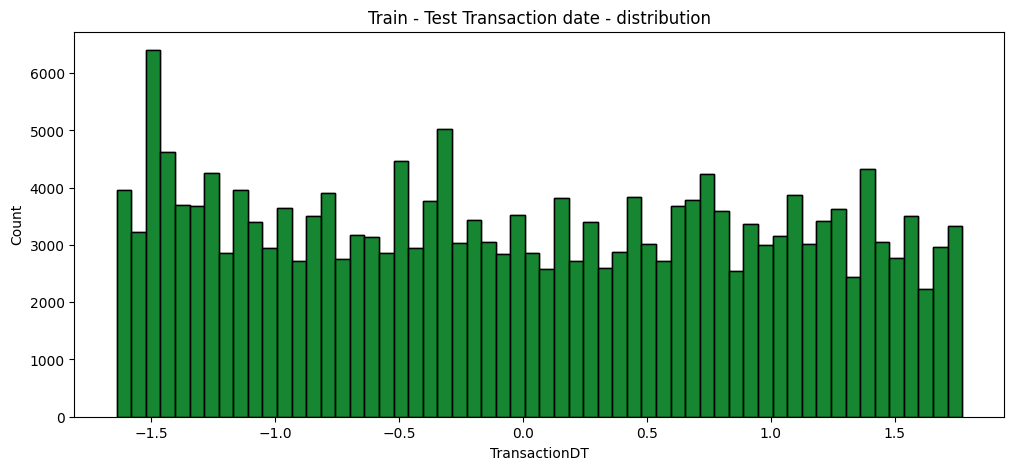

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,5))
sns.histplot(data['TransactionDT'])
sns.histplot(data['TransactionDT'],color='g')
axes.title.set_text('Train - Test Transaction date - distribution')
plt.show()

c:\Users\antuh\anaconda3\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


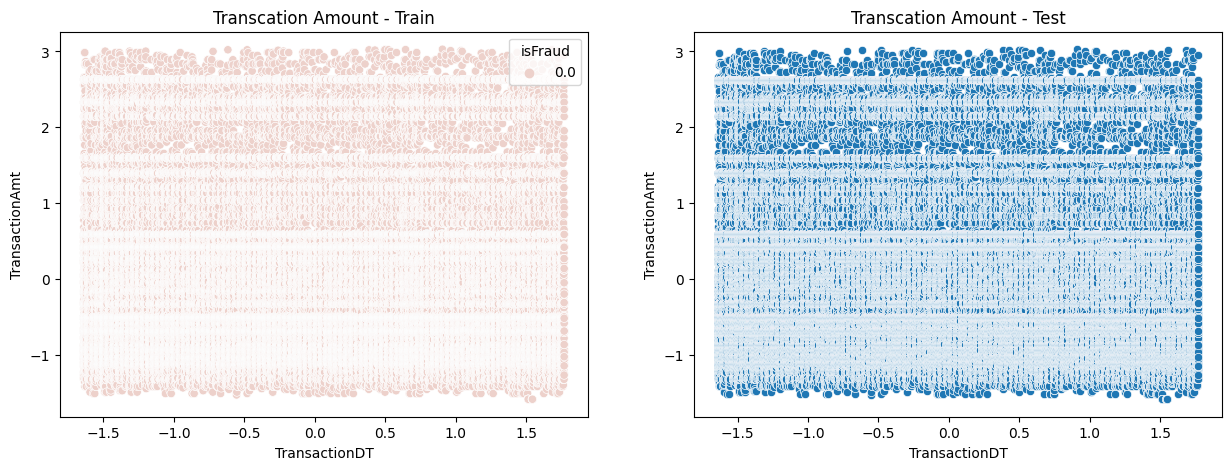

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))

sns.scatterplot(y=data['TransactionAmt'],x=data['TransactionDT'],hue=data['isFraud'],ax=axes[0])
axes[0].title.set_text('Transcation Amount - Train')

sns.scatterplot(y=data['TransactionAmt'],x=data['TransactionDT'],ax=axes[1])
axes[1].title.set_text('Transcation Amount - Test')

plt.show()

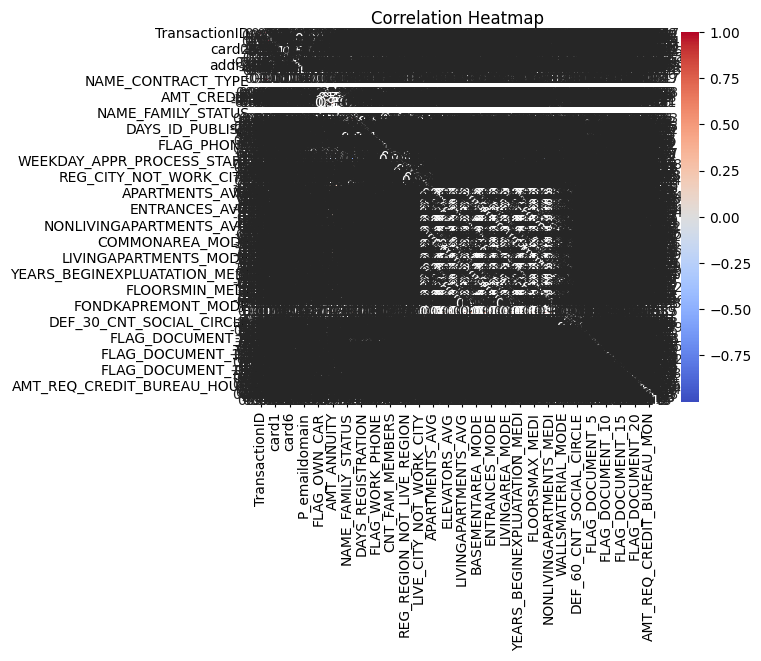

In [ ]:
data = data.apply(pd.to_numeric, errors='coerce')

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


C:\Users\antuh\AppData\Local\Temp\ipykernel_6896\3534590565.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['isFraud'],


<Axes: title={'center': 'isFraud'}>

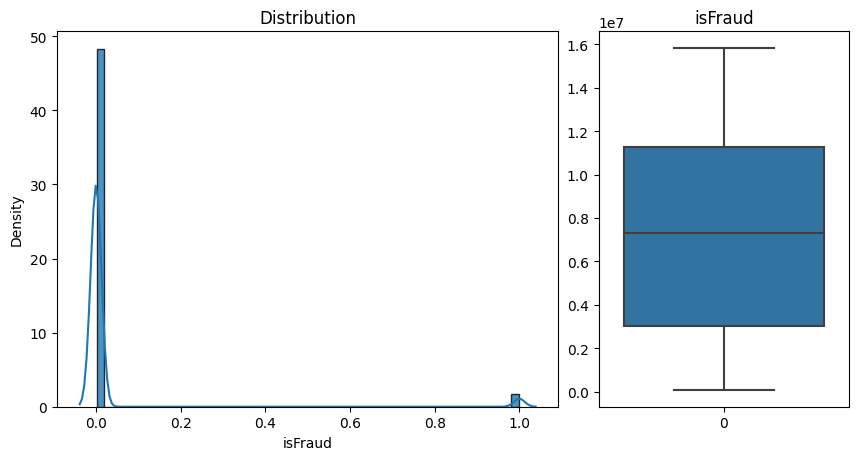

In [ ]:
import matplotlib.gridspec as gridspec
categorical = [i for i in data.loc[:,data.nunique()<=10]]
continuous = [i for i in data.loc[:,data.nunique()>=10]]
cust_palt = sns.color_palette("tab10")

fig = plt.figure(constrained_layout=True, figsize=(16, 12))


grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('Distribution')

sns.distplot(data['isFraud'],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[0])

ax15 = fig.add_subplot(grid[0, 2:3])

ax15.set_title('isFraud')

sns.boxplot(data[continuous[1]], orient='v', color=cust_palt[0])


In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
# Find numerical columns excluding those with no observed values
numerical_columns = data.select_dtypes(include=[np.number]).columns
numerical_columns_with_data = [col for col in numerical_columns if data[col].notna().any()]

# Impute numerical columns with mean values
imputer = SimpleImputer(strategy='mean')
data[numerical_columns_with_data] = imputer.fit_transform(data[numerical_columns_with_data])

# Handle columns with no observed values separately, e.g., drop or fill with a special value
for col in set(numerical_columns) - set(numerical_columns_with_data):
    # You can either drop the column: data.drop(columns=col, inplace=True)
    # Or fill the column with a special value: data[col].fillna(special_value, inplace=True)
    pass

In [ ]:
# Detecting and Handling Outliers
# Replace outliers with the nearest value within the IQR range
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Feature Transformation and Combination
# Standardize numerical features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


c:\Users\antuh\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\antuh\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\antuh\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

# Find numerical columns excluding those with no observed values
numerical_columns = data.select_dtypes(include=[np.number]).columns
numerical_columns_with_data = [col for col in numerical_columns if data[col].notna().any()]

# Impute numerical columns with mean values
imputer = SimpleImputer(strategy='mean')
data[numerical_columns_with_data] = imputer.fit_transform(data[numerical_columns_with_data])

# Create polynomial features with reduced degree
poly = PolynomialFeatures(degree=1, interaction_only=True, include_bias=False)  # Reducing the degree to 1
poly_data = poly.fit_transform(data[numerical_columns_with_data])
poly_columns = [f'poly_{i}' for i in range(poly_data.shape[1])]
data = pd.concat([data, pd.DataFrame(poly_data, columns=poly_columns)], axis=1)


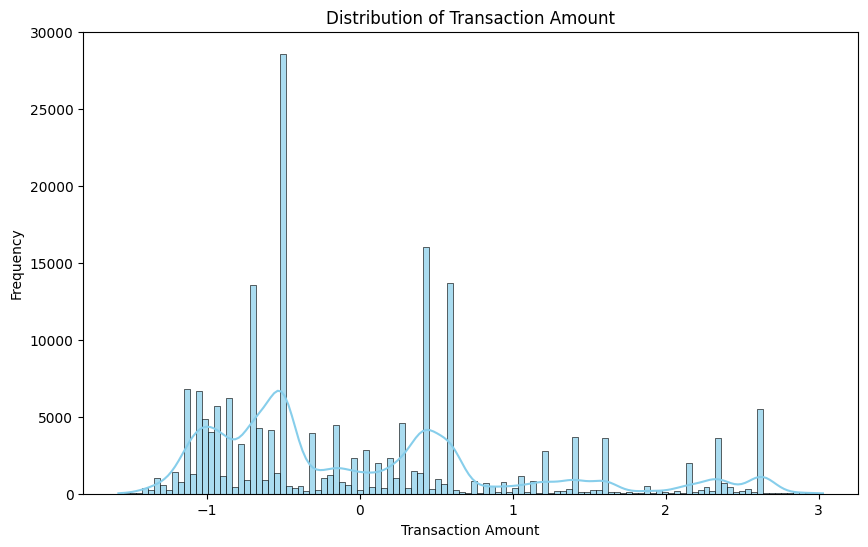

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of key features
plt.figure(figsize=(10, 6))
sns.histplot(data['TransactionAmt'], kde=True, color='skyblue', alpha=0.7)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

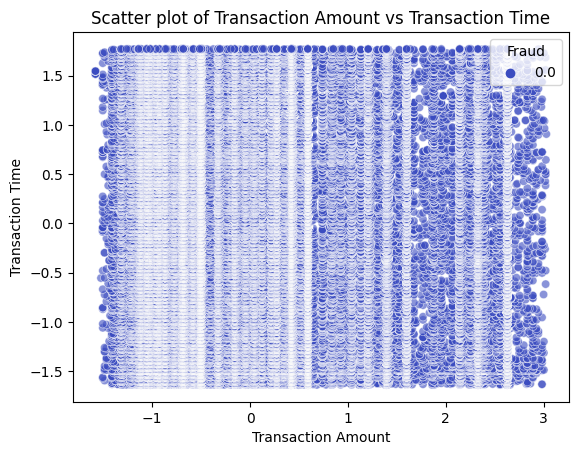

In [ ]:
sns.scatterplot(x='TransactionAmt', y='TransactionDT', data=data, hue='isFraud', palette='coolwarm', alpha=0.6)
plt.title('Scatter plot of Transaction Amount vs Transaction Time')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Time')
plt.legend(title='Fraud', loc='upper right')
plt.show()


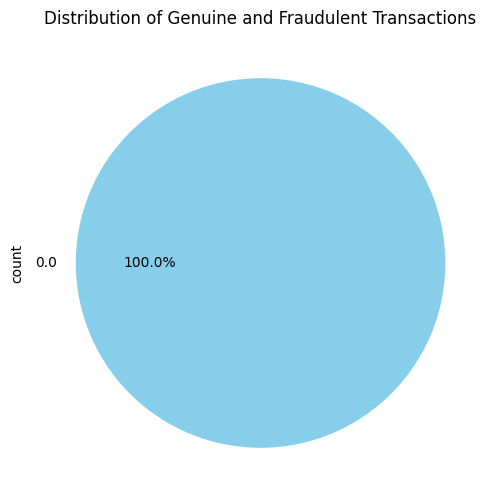

In [ ]:
# Visualize the balance between genuine and fraudulent transactions
plt.figure(figsize=(6, 6))
data['isFraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Genuine and Fraudulent Transactions')
plt.show()

**The following function serves as your "black box" RandomForest classifier. Use it exactly as provided. The only modifications required on your part are to adjust the dataframe name in the usage section and specify the appropriate target column name to match your dataset's structure.**



In [ ]:
data5=pd.read_csv('G:/Code_Files/CS4S773/Assessment-1/Trust_Bank data.csv')

C:\Users\antuh\AppData\Local\Temp\ipykernel_8412\1636810576.py:1: DtypeWarning: Columns (18,19,20,21,27,28,29,30,31,44,48,56,102,103,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  data5=pd.read_csv('G:/Code_Files/CS4S773/Assessment-1/Trust_Bank data.csv')


In [ ]:
reduced_vcols = ['TransactionID','isFraud','TransactionDT','TransactionAmt']  

In [ ]:
drop_cols = [col for col in data5.columns if col not in reduced_vcols]

print(f'Dropping {len(drop_cols)} columns')
df_train = data5.drop(columns=drop_cols)



Dropping 134 columns


In [ ]:
df_train.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt
0,2987000,0,86400,68.5
1,2987001,0,86401,29.0
2,2987002,0,86469,59.0
3,2987003,0,86499,50.0
4,2987004,0,86506,50.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def train_classification_model(dataframe, target_column):
    
    # Splitting the data
    X = dataframe.drop(target_column, axis=1)
    y = dataframe[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Getting accuracy and report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Model Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)

    return model, report

# Usage
# instead of df pass on your dataframe name

train_classification_model(df_train, 'isFraud')


Model Accuracy: 0.9721610729163139
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    113866
           1       0.69      0.40      0.51      4242

    accuracy                           0.97    118108
   macro avg       0.84      0.70      0.75    118108
weighted avg       0.97      0.97      0.97    118108



(RandomForestClassifier(),
 '              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.99    113866\n           1       0.69      0.40      0.51      4242\n\n    accuracy                           0.97    118108\n   macro avg       0.84      0.70      0.75    118108\nweighted avg       0.97      0.97      0.97    118108\n')